# MNIST digit classification using TensorFlow 2.0
- It requires fewer lines of code in comparision to TensorFlow 1.x version 
- It uses Keras

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


Importing MNIST dataset

In [4]:
mnist = tf.keras.datasets.mnist

# Creating train set and test set
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

Normalizing the train and test sets i.e. making sure that the values lie between 0 and 1

In [5]:
x_train , x_test = tf.cast(x_train / 255.0 , tf.float32) , tf.cast(x_test / 255.0 , tf.float32)

y_train , y_test = tf.cast(y_train , tf.int64) , tf.cast(y_test , tf.int64)


Creating Simple Neural Network

In [7]:
from keras.models import Sequential
from keras.layers import Dense , Flatten

model = Sequential()
model.add(Flatten())
model.add(Dense(256 , activation='relu'))
model.add(Dense(128 , activation='relu'))
model.add(Dense(10 , activation = 'softmax'))


Compiling the model

In [8]:
model.compile(optimizer='sgd' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

Training the model

In [9]:
# Training the model 

model_history = model.fit(x_train , y_train , batch_size=32 , epochs = 10 , validation_split= 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7149 - loss: 1.0963 - val_accuracy: 0.9100 - val_loss: 0.3202
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9053 - loss: 0.3233 - val_accuracy: 0.9267 - val_loss: 0.2575
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9242 - loss: 0.2644 - val_accuracy: 0.9382 - val_loss: 0.2226
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9352 - loss: 0.2247 - val_accuracy: 0.9428 - val_loss: 0.2001
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9423 - loss: 0.1956 - val_accuracy: 0.9496 - val_loss: 0.1787
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9494 - loss: 0.1743 - val_accuracy: 0.9514 - val_loss: 0.1684
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 997us/step - accuracy: 0.9542 - loss: 0.1583 - val_accuracy: 0.9532 - val_loss: 0.1593
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9586 - loss: 0.1430 

Evaluating the model

In [10]:
# evaluating the model 

performance_score = model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.9574 - loss: 0.1429


Model Summary

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (32, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 256)              │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 128)              │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 10)               │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,148 (918.55 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Performance analysis

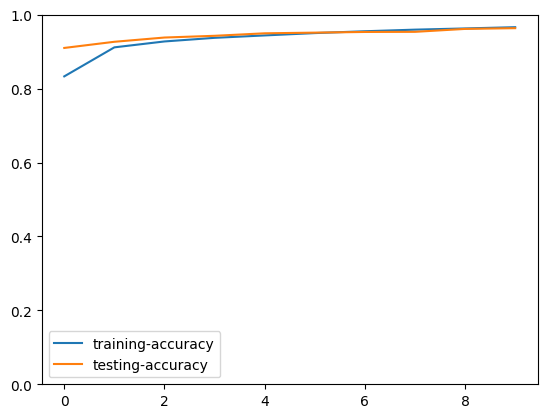

In [12]:
# performance plot

plt.plot(model_history.history['accuracy'] , label = 'training-accuracy')
plt.plot(model_history.history['val_accuracy'] , label = 'testing-accuracy')
plt.gca().set_yticks(np.arange(0, 1.1, 0.2))
plt.legend(loc = 'lower left')

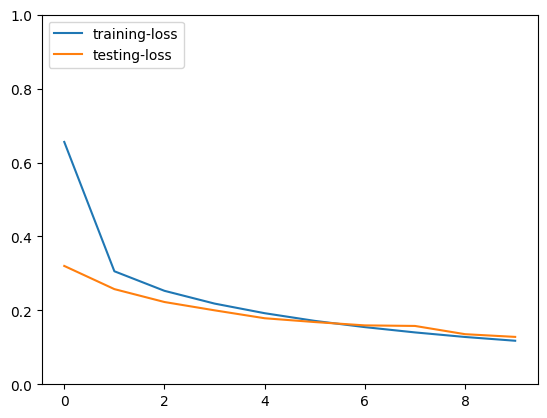

In [13]:
plt.plot(model_history.history['loss'] , label = 'training-loss')
plt.plot(model_history.history['val_loss'] , label = 'testing-loss')
plt.gca().set_yticks(np.arange(0, 1.1, 0.2))
plt.legend(loc = 'upper left')

Testing the Model Generated

In [14]:
model.save('MNIST_num_detector.keras')

In [15]:
MNIST_model = tf.keras.models.load_model('MNIST_num_detector.keras')

In [16]:
predictions = MNIST_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


The number shown in the image is: 1


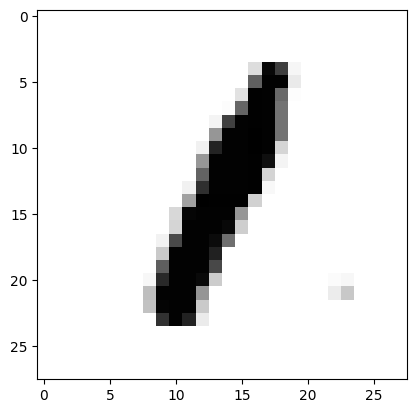

In [20]:
index = np.random.randint(0,9999)

plt.imshow(x_test[index] , cmap = "Greys")

print("The number shown in the image is:", np.argmax(predictions[index]))